## **Graduate Admission Chances Prediction using Machine Learning**

#### Importing useful Libraries

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [85]:
data = pd.read_csv("Admission_Predict.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#### Exploratory Data Analysis

In [86]:
data.shape

(400, 9)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [88]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [89]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [90]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [91]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

#### Removing outliers

<Axes: >

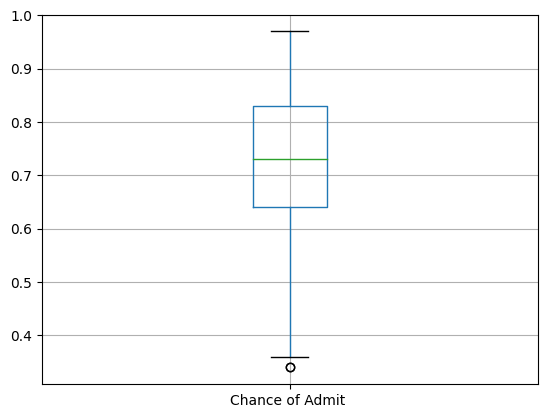

In [92]:
data.boxplot(column=["Chance of Admit "])

<Axes: >

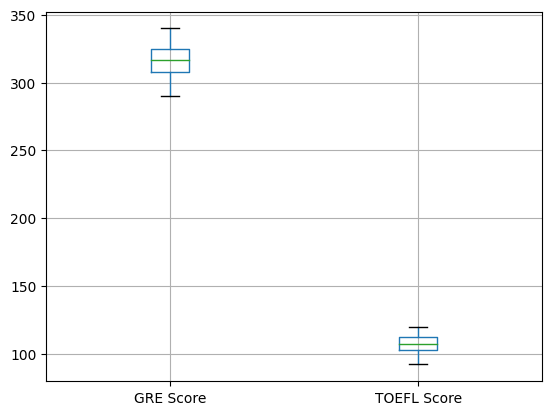

In [93]:
data.boxplot(column=["GRE Score","TOEFL Score"])

<Axes: >

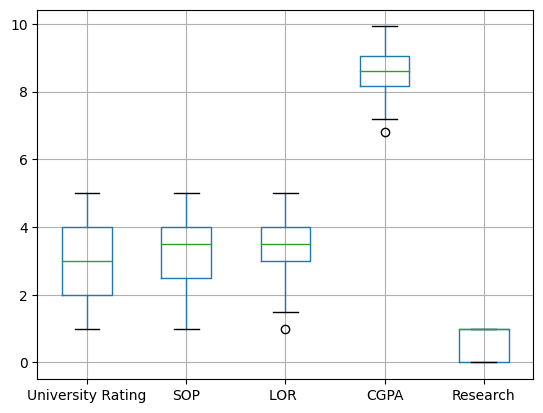

In [94]:
data.boxplot(column=["University Rating","SOP","LOR ","CGPA","Research"])

#### Removing Outliers using IQR method

In [95]:
data1 = data.copy()
data1.drop(["Serial No."], axis=1, inplace=True)

In [96]:
#Calculating Quartiles for each feature
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3-Q1
print(IQR)

GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
SOP                   1.5000
LOR                   1.0000
CGPA                  0.8925
Research              1.0000
Chance of Admit       0.1900
dtype: float64


In [97]:
#Identifying outliers
df_out1 = data1[((data1 < (Q1 - 1.5 * IQR)) | (data1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
58,300,99,1,3.0,2.0,6.80,1,0.36
92,298,98,2,4.0,3.0,8.03,0,0.34
347,299,94,1,1.0,1.0,7.34,0,0.42
376,297,96,2,2.5,2.0,7.43,0,0.34


In [98]:
#removing outliers
df_out1 = data1[~((data1 < (Q1 - 1.5 * IQR)) | (data1 > (Q3 + 1.5 * IQR))).any(axis=1)]
data = df_out1.copy()
print(data.shape)

(396, 8)


#### Unvariate Analysis

Text(0.5, 0, 'Chances')

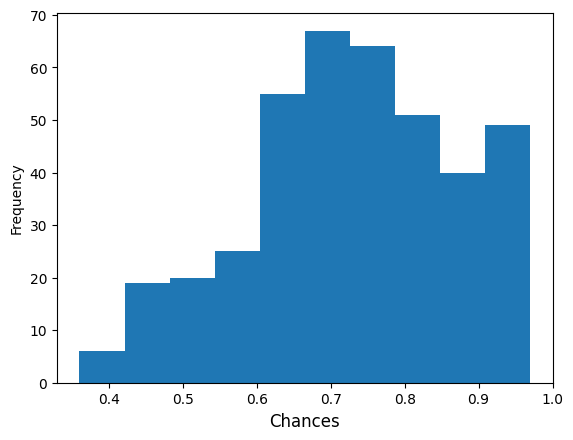

In [99]:
data["Chance of Admit "].plot.hist()
plt.xlabel("Chances",fontsize = 12)

Text(0.5, 0, 'Rating')

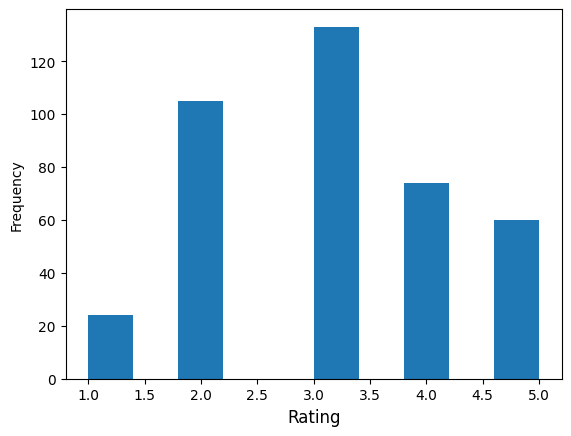

In [100]:
data["University Rating"].plot.hist()
plt.xlabel("Rating",fontsize=12)

In [101]:
data["Research"].value_counts()

Research
1    218
0    178
Name: count, dtype: int64

#### Bivariate Analysis

<Axes: xlabel='GRE Score', ylabel='Chance of Admit '>

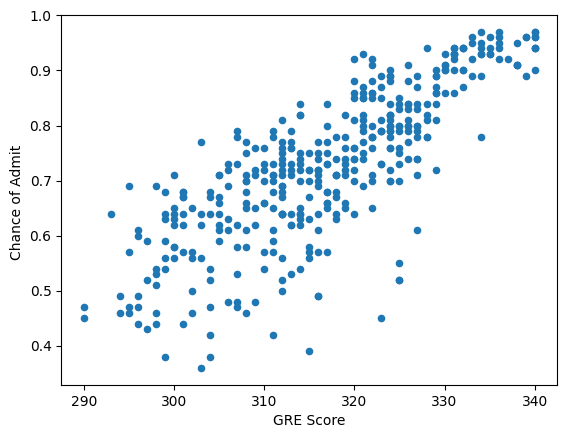

In [102]:
data.plot.scatter("GRE Score","Chance of Admit ")

#### Understanding correlations

In [103]:
data["GRE Score"].corr(data["Chance of Admit "])

0.7981446024321519

In [104]:
data["TOEFL Score"].corr(data["Chance of Admit "])

0.7855190145501374

<Axes: xlabel='CGPA', ylabel='Chance of Admit '>

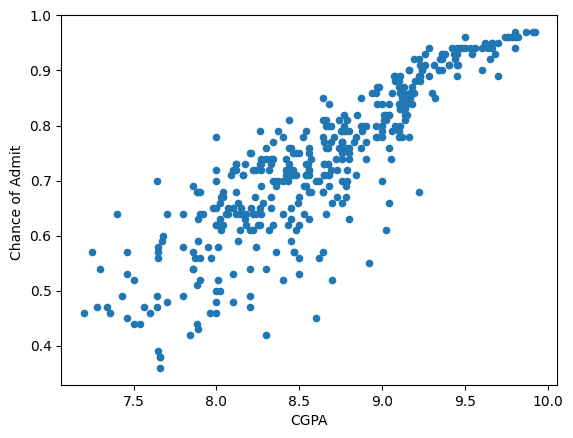

In [105]:
data.plot.scatter("CGPA","Chance of Admit ")

In [106]:
data["CGPA"].corr(data["Chance of Admit "])

0.8709125643678222

In [107]:
data["CGPA"].corr(data["TOEFL Score"])

0.8253845537475005

In [108]:
data["CGPA"].corr(data["GRE Score"])

0.8310846092236093

#### Thus, with more CGPA, the student will definitely get a good score in TOEFL and GRE

### **Building the Model**

#### Preprocessing the data

In [109]:
#Seperating dependent and independent variables
x = data.drop(["Chance of Admit "], axis=1)
y = data["Chance of Admit "]
x.shape, y.shape

((396, 7), (396,))

In [110]:
#training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=56)

#### Model selection and training

In [111]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler

In [112]:
scalar = StandardScaler()

In [113]:
x_train_normalized = scalar.fit_transform(x_train)
x_test_normalized = scalar.fit_transform(x_test)

In [117]:
lr = LR()
lr.fit(x_train_normalized,y_train)

LinearRegression()

#### Prediction using the model

In [118]:
train_predict = lr.predict(x_train_normalized)
k = mae(train_predict,y_train)
print("Test mean absolute error for training data : ", k)

Test mean absolute error for training data :  0.04232224824832757


In [119]:
train_predict = lr.predict(x_test_normalized)
k = mae(train_predict,y_test)
print("Test mean absolute error for testing data : ", k)

Test mean absolute error for testing data :  0.047494264627287175


##### Since the MAE of our model for testing data is close to the original training data, so, we can say that out model is accurate

#### **Model Evaluation**

In [120]:
from sklearn.metrics import mean_squared_error

In [123]:
pred_train = lr.predict(x_train_normalized)
train_score = np.sqrt(mean_squared_error(y_train,pred_train))
print(train_score)

0.060088762065116166


In [126]:
pred_test = lr.predict(x_test_normalized)
test_score = np.sqrt(mean_squared_error(y_test,pred_test))
print(test_score)

0.06814692882949593


In [127]:
print("Training score : ",train_score)
print("Validation score : ",test_score)

Training score :  0.060088762065116166
Validation score :  0.06814692882949593


#### **Conclusions**

In [129]:
train = lr.score(x_train_normalized,y_train)*100
test = lr.score(x_test_normalized,y_test)*100
print("Accuracy on training set : ",train)
print("Accuracy on testing set : ",test)

Accuracy on training set :  80.49073288220829
Accuracy on testing set :  77.97253368249402
